In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/NHANES_age_prediction.csv')

In [3]:
df.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564,Adult,61,2,2,35.7,110,2,150,14.91
1,73568,Adult,26,2,2,20.3,89,2,80,3.85
2,73576,Adult,16,1,2,23.2,89,2,68,6.14
3,73577,Adult,32,1,2,28.9,104,2,84,16.15
4,73580,Adult,38,2,1,35.9,103,2,81,10.92


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   int64  
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   int64  
 3   RIAGENDR   2278 non-null   int64  
 4   PAQ605     2278 non-null   int64  
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   int64  
 7   DIQ010     2278 non-null   int64  
 8   LBXGLT     2278 non-null   int64  
 9   LBXIN      2278 non-null   float64
dtypes: float64(2), int64(7), object(1)
memory usage: 178.1+ KB


In [5]:
df.shape

(2278, 10)

In [6]:
df.isnull().sum()

SEQN         0
age_group    0
RIDAGEYR     0
RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
dtype: int64

In [10]:
df['age_group'].value_counts()

age_group
Adult     1914
Senior     364
Name: count, dtype: int64

<Axes: xlabel='age_group', ylabel='count'>

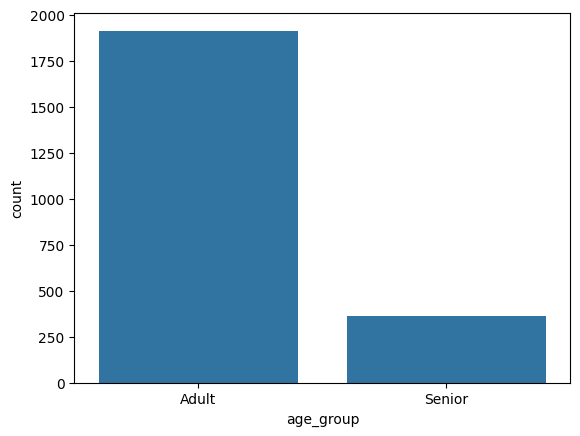

In [11]:
sns.countplot(x='age_group',data=df)

In [19]:
X=df.iloc[:,2:]
y=df['age_group']

In [20]:
X.head()

,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,61,2,2,35.7,110,2,150,14.91
1,26,2,2,20.3,89,2,80,3.85
2,16,1,2,23.2,89,2,68,6.14
3,32,1,2,28.9,104,2,84,16.15
4,38,2,1,35.9,103,2,81,10.92


In [21]:
ss = StandardScaler()
ss.fit_transform(X)

array([[ 0.95297863,  0.97742765,  0.44467188, ..., -0.08755269,
         0.74432296,  0.31648741],
       [-0.78384872,  0.97742765,  0.44467188, ..., -0.08755269,
        -0.74342728, -0.82176167],
       [-1.2800851 , -1.02309363,  0.44467188, ..., -0.08755269,
        -0.99847018, -0.58608442],
       ...,
       [-0.38685961, -1.02309363,  0.44467188, ..., -0.08755269,
         0.19173001,  0.98544031],
       [ 0.90335499,  0.97742765,  0.44467188, ..., -0.08755269,
        -0.14832719, -0.70443762],
       [-0.78384872, -1.02309363,  0.44467188, ..., -0.08755269,
        -0.14832719, -0.83102409]])

In [22]:
samples=[]
for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=i)
  samples.append((X_train, X_test, y_train, y_test))

In [23]:
kernels=['linear','poly','rbf','sigmoid']
ans= pd.DataFrame(columns=['Sample','Best Accuracy','Best Kernel','Best Nu','Best Epsilon'])

In [24]:
def fitness(kernel, C, gamma):
  svm=SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred=svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

In [25]:
for i in range(len(samples)):
  best_accuracy=0
  best_C= 0
  best_gamma=0
  for kernel in kernels:
    X_train, X_test, y_train, y_test =samples[i]
    C=np.random.uniform(0,10)
    gamma=np.random.uniform(0,10)
    score=fitness(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy=round(score,2)
      best_C=round(C,2)
      best_gamma=round(gamma,2)
      best_kernel=kernel
  ans.loc[i]=[i+1,best_accuracy,best_kernel,best_C,best_gamma]

In [30]:
ans


,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,1.0,linear,0.12,6.44
1,2,1.0,linear,7.95,6.43
2,3,1.0,linear,5.93,8.16
3,4,1.0,linear,2.90,2.99
4,5,1.0,linear,9.35,9.32
5,6,1.0,linear,0.69,5.58
6,7,1.0,linear,0.61,8.17
7,8,1.0,linear,6.63,3.93
8,9,1.0,linear,7.35,4.13
9,10,1.0,linear,8.47,3.72
